# T-cup diagrams

### Introduction

T-cup diagrams are generally used to represent storages in the reservoir. An example of T-cup diagram is shown below

![sample Tcup](sample_T-cup.png)

In the T-cup sample figure shown, the blue color filling shows the level of the water in the reservoir which is around 60\% of the capacity. An example usage of these figures are the live storage volumes representation on the [map](https://www.usbr.gov/uc/water/basin/index.html). The fraction of water fill is in comparison to the total capacity of the reservoir. In the exploratory experiments, the question is how we show different states of the world or an ensemble of scenarios. First I define a function to plot as shown in the above figure and then we shall make edits to this function for a dataset assuming a thousand scenarios.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl


### Functions for sample T-cup plot

First, let's use a function to plot the sample T-cup figure shown above for a single case say for a median or current value of storage. This function takes the single value as the storage level, along with the x and y-limits of the plot. The T-cup includes drawing a trapezoid in two steps: a) rectangle b)filling the corners as shown in the figure below

![steps](Steps_T-cup.png)

Two different xlimits and ylimits are defined. xlim and ylim called in the function are the limits of the plot whereas inside the function the limits are defined for the trapezoid

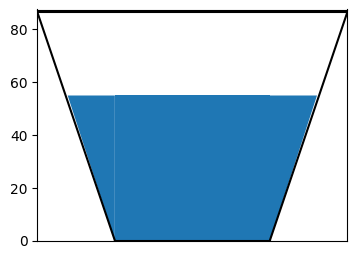

In [2]:
#function to make teacups
def med_make_teacups(hist_median, xlim, ylim):
    '''hist_median is the storage level of the lake/reservoir
    xlim and ylim are limits of the plot'''
    # make the plot

    #define limits for trapezoid
    x1 = [16.8955, 43.15]
    x2 = [129.45, 155.70]

    fig = plt.figure(figsize=(4, 3))

    ax = fig.gca()

    #plotting rectangle as in fig (a)
    ax.fill_between([x1[1], x2[0]], [hist_median, hist_median], [0, 0])

    # fill corners as show in fig (b)
    ax.fill_between([x1[0], x1[1]], [hist_median, hist_median],
                    [hist_median, 0], color='#1f77b4', edgecolor='none')

    ax.fill_between([x2[0], x2[1]], [hist_median, hist_median],
                    [0, hist_median], color='#1f77b4', edgecolor='none')

    ax.set_xlim([0,xlim])
    ax.set_ylim([0,ylim+1])

    #draw the borders of the trapezoid
    ax.plot([0,43.15], [86.3,0], c='k')
    ax.plot([43.15, 129.45], [0, 0], c='k')
    ax.plot([129.45, 172.6], [0, 86.3], c='k')
    ax.plot([0,172.6], [86.3, 86.3], c='k')
    
    ax.axes.get_xaxis().set_visible(False)
    #save fig in desired format
    plt.savefig('T-cup_med.png', bbox_inches='tight')


#calling the function
med_make_teacups(54.8, 172.6, 86.3)


Here, we define a function to determine the x coordinates of the trapezoid for the input data reservoir levels. These coordinates were defined for the sample T-cup above randomly to plot a trapezoid.

In [3]:
def find_x_coords(yvalues):
    '''
    returns x coordinates for teacup plot

    :param yvalues:         numpy array of reservoir levels
    :return:
        x1:                 array of right side of teacup
        x2:                 array of left side of teacup
    '''

    x1 =  np.zeros(len(yvalues))
    x2 = np.zeros(len(yvalues))

    for i in range(len(yvalues)):
        x1[i] = (max(yvalues) - yvalues[i])/2
        x2[i] = 1.5 * max(yvalues) + yvalues[i]/2

    return x1, x2

### T-cup plot function for an ensemble

The next function gets the color for each percentile in the ensemble to represent the storage colored differently for different percentiles of the ensemble. The historical median and critical values of the reservoir are input to the function to compare these with the ensemble. The data is read as csv file inside the function that contains 99 rows for each percentile varying from 1 to 99 and 1000 columns for each scenario in the ensemble. 

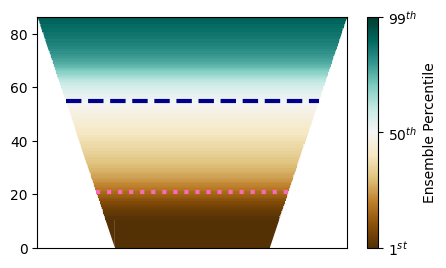

In [4]:
def make_teacups(res_abbrev, hist_median, crit):
    '''
    Plots teacup diagrams for a reservoir for an ensemble

    :param res_abbrev:                      str, abbrev of res name (BM)
    :param crit:                            float, low storage level to plot as a benchmark
    '''

    baseline_rels = np.loadtxt(res_abbrev + '_realizationPercentiles_baseline_run_1_to_99.csv',
                               delimiter=',')
    baseline_means = np.mean(baseline_rels, axis=1)/10000

    # add zeros to each array
    baseline_means = np.hstack([np.zeros(1), baseline_means])

    baseline_x1, baseline_x2 = find_x_coords(baseline_means)

    # copy the baseline means and set them as the historical, then add the historical median to the middle entry
    # This overly complicated method of adding the historical median is done to make plotting the teacups easier
    hist_percentiles = baseline_means
    hist_percentiles[9] = hist_median

    # make the plot
    fig = plt.figure(figsize=(5, 3))

    ax = fig.gca()
    for i, p in enumerate(range(0, 99)):
        # make base plot
        ax.fill_between([baseline_x1[i], baseline_x2[i]], [baseline_means[i], baseline_means[i]],
                        [baseline_means[i + 1], baseline_means[i + 1]], color=cm.BrBG(p / 100), edgecolor='none')

        # fill corners
        ax.fill_between([baseline_x1[i], baseline_x1[i + 1]], [baseline_means[i + 1], baseline_means[i + 1]],
                        [baseline_means[i], baseline_means[i + 1]], color=cm.BrBG(p / 100), edgecolor='none')

        ax.fill_between([baseline_x2[i], baseline_x2[i + 1]], [baseline_means[i + 1], baseline_means[i + 1]],
                        [baseline_means[i], baseline_means[i + 1]], color=cm.BrBG(p / 100), edgecolor='none')

    hist_mean_x1, hist_mean_x2 = find_x_coords(hist_percentiles)

    crit_mean_x1, crit_mean_x2 = find_x_coords([0, crit, max(baseline_means)])

    #plot historical line 
    ax.plot([hist_mean_x1[9], hist_mean_x2[9] ], np.ones(2) * hist_percentiles[9],
            linewidth=3,
            color='darkblue', linestyle='--')
    #plot critical line
    ax.plot([((max(baseline_means) - crit) / 2), (1.5 * max(baseline_means) + crit / 2)],
            np.ones(2) * crit, linewidth=3,
            color='hotpink', linestyle=':')


    ax.set_xlim([0, 2*max(baseline_means)])
    ax.set_ylim([0, max(baseline_means)])

    ax.axes.get_xaxis().set_visible(False)
    #add color bar as legend and include percentiles
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap='BrBG'),
             ax=ax, ticks=[0,0.5,1], orientation='vertical', label='Ensemble Percentile')
    cbar.set_ticks([0,0.5,1], labels=['1$^{st}$','50$^{th}$','99$^{th}$'])

    plt.savefig(res_abbrev + '_teacups.png', bbox_inches='tight')

make_teacups('BM', 54.8, 20.8)

### Conclusion

This example should provide a guideline to plot reserovir storages for an ensemble varying based on percentile values. If you have any suggestions to improve this style of figure, feel free to open a GitHub Issue or contribute directly to [this page](https://github.com/reedgroup/reedgroup.github.io/blob/main/docs/FigureLibrary/T-cup%20diagrams.ipynb) in the Reed Group Lab Manual repository. 